In [5]:
from highway import Highway
import numpy as np
import matplotlib.pyplot as plt

densities = np.linspace(0.25, 0.35, 10)
number_of_vehicles = 500

one_slowdown = Highway(
    density=0.3,
    number_of_vehicles=number_of_vehicles
)

one_slowdown.set_slowdowns([
    (0.25, 0.5, 1.0),
    (0.75, 1.0, 1.0)
])

In [ ]:
max_jam_lens = []

for density in densities:
    sim = one_slowdown.fresh_copy()
    sim.density = density
    sim.simulate_till_steady_state()

    x = one_slowdown.get_positions()
    y1 = one_slowdown.get_velocities()
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y1 = y1[sorted_indices]

    max_jam_len = 0
    found = False
    for i in y1:
        if i < 1.75:
            max_jam_len += 1
        else:
            if max_jam_len > 10:
                max_jam_lens.append(max_jam_len)
                break

  7%|▋         | 1359/20000 [00:04<01:00, 308.09it/s]

In [4]:
print(max_jam_lens)

[]


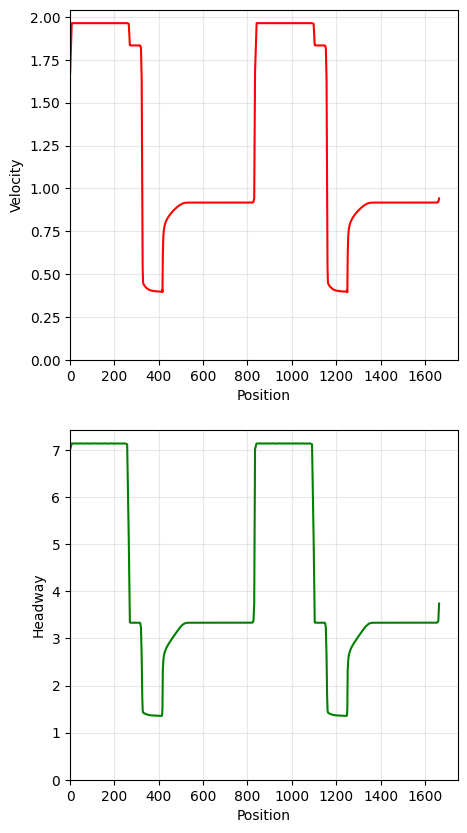

In [3]:
x = one_slowdown.get_positions()
y1 = one_slowdown.get_velocities()
y2 = one_slowdown.get_headways()

# sort by x
sorted_indices = np.argsort(x)
x = x[sorted_indices]
y1 = y1[sorted_indices]
y2 = y2[sorted_indices]

plt.figure(figsize=(5, 10))

plt.subplot(2, 1, 1)
plt.plot(x, y1, color='red')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(x, y2, color='green')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Position')
plt.ylabel('Headway')
plt.grid(True, alpha=0.3)

plt.show()

# JAM LENGTH LETS GO